# Day 5: Univariate, Bivariate, and Multivariate Analysis


In [5]:

import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import warnings
warnings.simplefilter(action='ignore', category=FutureWarning)


In [6]:

dataset_path = r"D:\Infosys SpringBoard Virtual Internship 6.0\US_Accidents_March23.csv"
accidents_df = pd.read_csv(dataset_path)
print(f"Dataset loaded successfully with shape: {accidents_df.shape}")


Dataset loaded successfully with shape: (7728394, 46)


## Univariate Analysis  
_Univariate analysis examines one variable at a time to understand its distribution and spread._


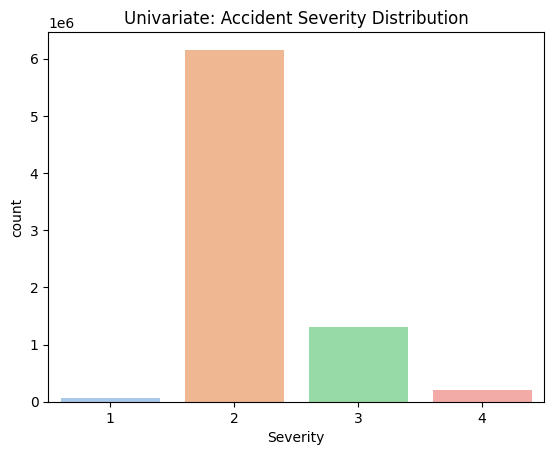

In [7]:
# Distribution of 'Severity' (categorical)
sns.countplot(x='Severity', data=accidents_df, palette='pastel')
plt.title('Univariate: Accident Severity Distribution')
plt.show()


## Step : Bivariate Analysis  
_Bivariate analysis explores the relationship between two variables._


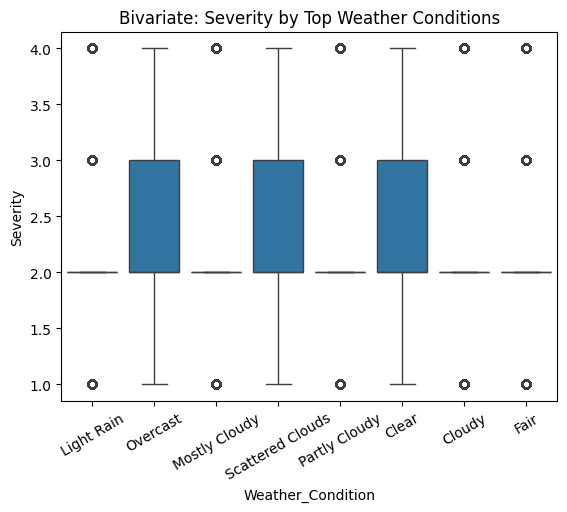

In [8]:
# Relationship between Severity and Weather_Condition
top_weather = accidents_df['Weather_Condition'].value_counts().nlargest(8)

sns.boxplot(
    x='Weather_Condition', y='Severity', 
    data=accidents_df[accidents_df['Weather_Condition'].isin(top_weather.index)]
)
plt.title('Bivariate: Severity by Top Weather Conditions')
plt.xticks(rotation=30)
plt.show()


## Step : Multivariate Analysis  
_Multivariate analysis explores the relationship among three or more variables._


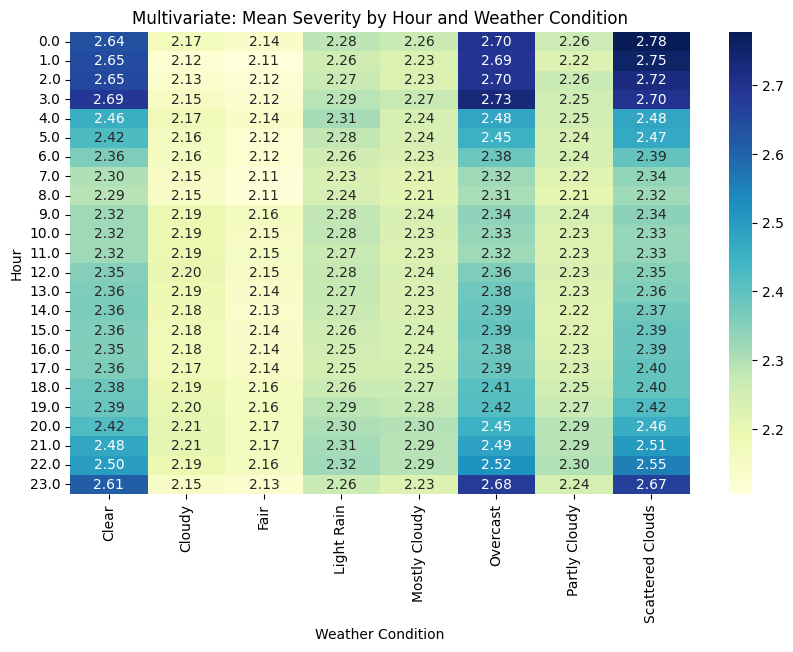

In [9]:
# Severity by Hour and Weather Condition
if 'Hour' not in accidents_df:
    accidents_df['Hour'] = pd.to_datetime(accidents_df['Start_Time'], errors='coerce').dt.hour

pivot = accidents_df[accidents_df['Weather_Condition'].isin(top_weather.index)].pivot_table(
    values='Severity', index='Hour', columns='Weather_Condition', aggfunc='mean'
)

plt.figure(figsize=(10, 6))
sns.heatmap(pivot, annot=True, fmt=".2f", cmap='YlGnBu')
plt.title('Multivariate: Mean Severity by Hour and Weather Condition')
plt.ylabel('Hour')
plt.xlabel('Weather Condition')
plt.show()


## Step : Basic Statistics  
_Summary statistics help understand central tendency, spread, and shape of distributions._


In [10]:

print("Summary statistics for numerical columns:")
display(accidents_df.describe().T)


Summary statistics for numerical columns:


,count,mean,std,min,25%,50%,75%,max
Severity,7728394.0,2.212384,0.487531,1.000000,2.000000,2.000000,2.000000,4.000000
Start_Lat,7728394.0,36.201195,5.076079,24.554800,33.399631,35.823974,40.084959,49.002201
Start_Lng,7728394.0,-94.702545,17.391756,-124.623833,-117.219396,-87.766616,-80.353676,-67.113167
End_Lat,4325632.0,36.261829,5.272905,24.566013,33.462070,36.183495,40.178920,49.075000
End_Lng,4325632.0,-95.725570,18.107928,-124.545748,-117.754345,-88.027890,-80.247086,-67.109242
Distance(mi),7728394.0,0.561842,1.776811,0.000000,0.000000,0.030000,0.464000,441.750000
Temperature(F),7564541.0,61.663286,19.013653,-89.000000,49.000000,64.000000,76.000000,207.000000
Wind_Chill(F),5729375.0,58.251048,22.389832,-89.000000,43.000000,62.000000,75.000000,207.000000
Humidity(%),7554250.0,64.831041,22.820968,1.000000,48.000000,67.000000,84.000000,100.000000
Pressure(in),7587715.0,29.538986,1.006190,0.000000,29.370000,29.860000,30.030000,58.630000


In [11]:

print("\nMedian values for numerical columns:")
display(accidents_df.median(numeric_only=True))



Median values for numerical columns:


Severity              2.000000
Start_Lat            35.823974
Start_Lng           -87.766616
End_Lat              36.183495
End_Lng             -88.027890
Distance(mi)          0.030000
Temperature(F)       64.000000
Wind_Chill(F)        62.000000
Humidity(%)          67.000000
Pressure(in)         29.860000
Visibility(mi)       10.000000
Wind_Speed(mph)       7.000000
Precipitation(in)     0.000000
Amenity               0.000000
Bump                  0.000000
Crossing              0.000000
Give_Way              0.000000
Junction              0.000000
No_Exit               0.000000
Railway               0.000000
Roundabout            0.000000
Station               0.000000
Stop                  0.000000
Traffic_Calming       0.000000
Traffic_Signal        0.000000
Turning_Loop          0.000000
Hour                 13.000000
dtype: float64

## Step 7: Explore Distributions of Key Features



Severity value counts:
Severity
1      67366
2    6156981
3    1299337
4     204710
Name: count, dtype: int64


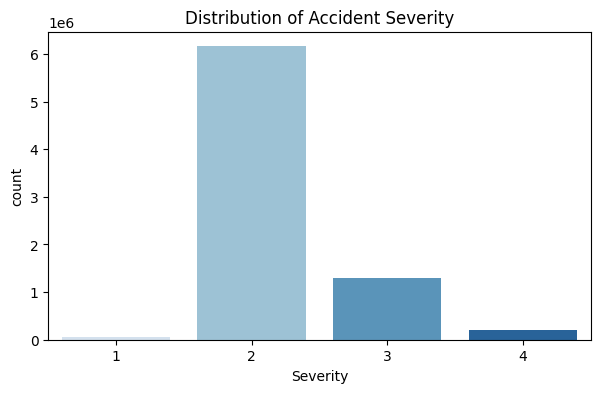

In [12]:
# 1. Severity Distribution
print("\nSeverity value counts:")
print(accidents_df['Severity'].value_counts().sort_index())

plt.figure(figsize=(7, 4))
sns.countplot(x='Severity', data=accidents_df, palette='Blues')
plt.title('Distribution of Accident Severity')
plt.show()


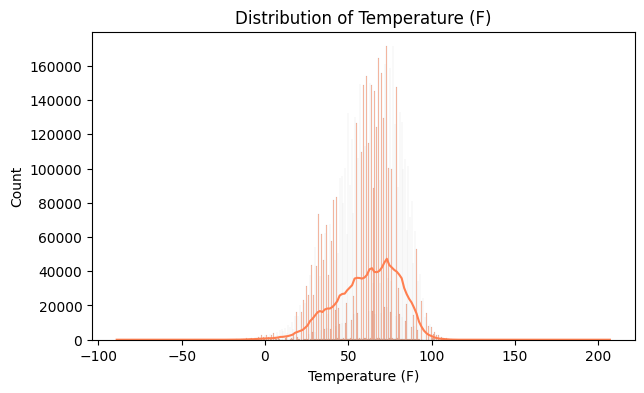

Temperature (F): min = -89.0 | max = 207.0


In [13]:
# 2. Temperature Distribution
plt.figure(figsize=(7, 4))
sns.histplot(accidents_df['Temperature(F)'].dropna(), kde=True, color='coral')
plt.title('Distribution of Temperature (F)')
plt.xlabel('Temperature (F)')
plt.show()

print("Temperature (F): min =", accidents_df['Temperature(F)'].min(), 
      "| max =", accidents_df['Temperature(F)'].max())


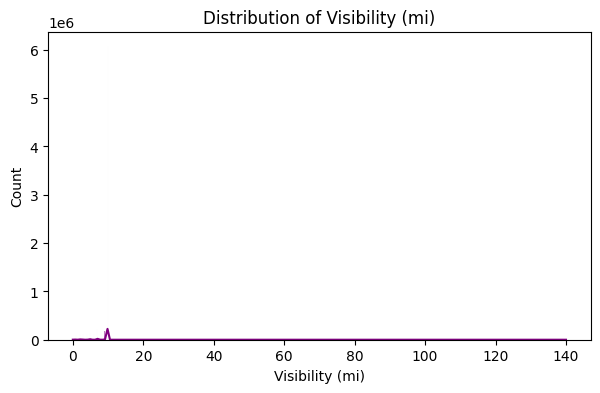

Visibility (mi): min = 0.0 | max = 140.0


In [14]:
# 3. Visibility Distribution
plt.figure(figsize=(7, 4))
sns.histplot(accidents_df['Visibility(mi)'].dropna(), kde=True, color='purple')
plt.title('Distribution of Visibility (mi)')
plt.xlabel('Visibility (mi)')
plt.show()

print("Visibility (mi): min =", accidents_df['Visibility(mi)'].min(),
      "| max =", accidents_df['Visibility(mi)'].max())


C:\Users\syamc\AppData\Roaming\Python\Python313\site-packages\pandas\core\nanops.py:1016: RuntimeWarning: invalid value encountered in subtract
  sqr = _ensure_numeric((avg - values) ** 2)


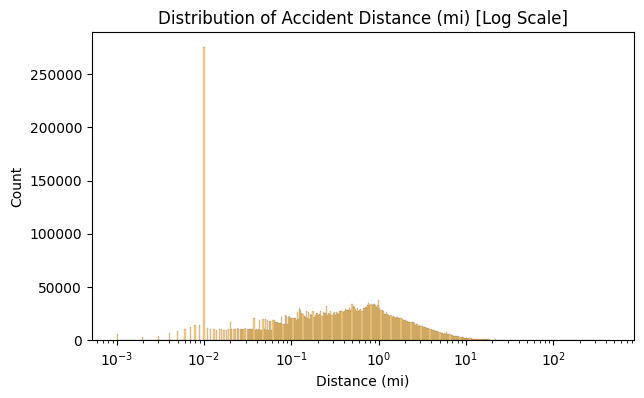

Distance (mi): min = 0.0 | max = 441.75


In [15]:
# 4. Distance Distribution (log scale for skewed data)
plt.figure(figsize=(7, 4))
sns.histplot(accidents_df['Distance(mi)'].dropna(), kde=True, color='orange', log_scale=True)
plt.title('Distribution of Accident Distance (mi) [Log Scale]')
plt.xlabel('Distance (mi)')
plt.show()

print("Distance (mi): min =", accidents_df['Distance(mi)'].min(),
      "| max =", accidents_df['Distance(mi)'].max())



Most frequent Weather Conditions:
Weather_Condition
Fair                2560802
Mostly Cloudy       1016195
Cloudy               817082
Clear                808743
Partly Cloudy        698972
Overcast             382866
Light Rain           352957
Scattered Clouds     204829
Light Snow           128680
Fog                   99238
Name: count, dtype: int64


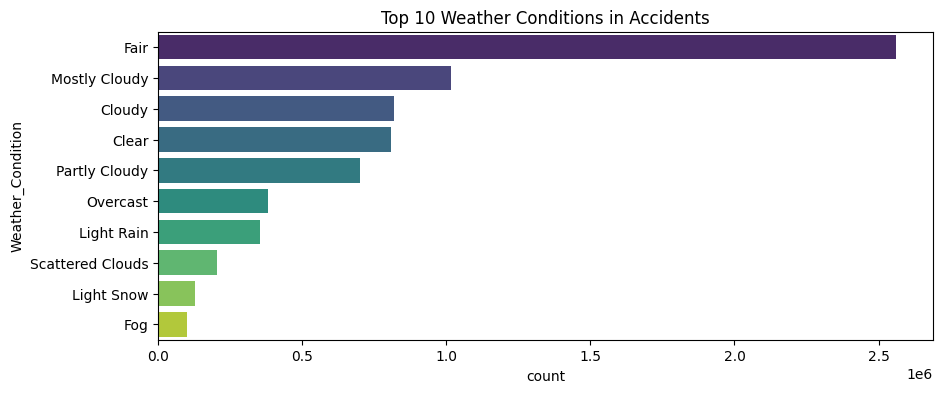

In [16]:
# 5. Weather Conditions (Top 10)
print("\nMost frequent Weather Conditions:")
print(accidents_df['Weather_Condition'].value_counts(dropna=True).head(10))

plt.figure(figsize=(10, 4))
sns.countplot(
    y='Weather_Condition',
    data=accidents_df,
    order=accidents_df['Weather_Condition'].value_counts().index[:10],
    palette='viridis'
)
plt.title('Top 10 Weather Conditions in Accidents')
plt.show()


In [17]:
# 6. Latitude & Longitude Ranges
print("\nLatitude range:", accidents_df['Start_Lat'].min(), "to", accidents_df['Start_Lat'].max())
print("Longitude range:", accidents_df['Start_Lng'].min(), "to", accidents_df['Start_Lng'].max())



Latitude range: 24.5548 to 49.002201
Longitude range: -124.623833 to -67.113167
